# Ejercicio Ridge, Lasso y ElasticNet
Para este ejercicio vas a trabajar con datos de ventas de una empresa que fabrica muebles en España. Esta empresa es una Pyme que demanda conocer de antemano qué ingresos va a tener cada mes, ya que necesita pedir un anticipio a su entidad financiera de cara a poder abastecerse de materia prima al comenzar el mes. Como desconoce cuánto tiene que pedir, tira al alza y acaba pagando muchos intereses. El objetivo es reducir estos gastos.

En las bases de datos de la empresa constan todos los gastos en publicidad y ventas, para cada uno de los meses desde su fundación (hace más de 15 años).

Dado que los presupuestos de marketing se cierran al principio de cada mes, la empresa necesita un modelo predictivo que le anticipe las ventas que conseguirá a final de mes en función de los gastos que realizará en marketing.

Para ello tendrás que utilizar tanto modelos de regresión normales, como regularizados.

1. Carga los datos y realiza un pequeño análisis exploratorio. Mira a ver cómo se relaciona las ventas con el resto de variables.
2. Crea varios modelos y modifica los hiperparámetros necesarios para mejorar el performance del modelo.
3. Interpreta los resultados. Traduce a una fórmula tu mejor modelo (escribir la fórmula simplemente). ¿Cuánto cambian las ventas si aumentamos la inversión en radio un punto más? ¿Y si aumentamos la inversión en TV o periódicos?

## Import libraries 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Exploratory Data Analysis 

In [6]:
DATAPATH = 'data/Advertising.csv'

data = pd.read_csv(DATAPATH)
data.drop(columns=['Unnamed: 0'], inplace=True)
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22100.0
1,44.5,39.3,45.1,10400.0
2,17.2,45.9,69.3,9300.0
3,151.5,41.3,58.5,18500.0
4,180.8,10.8,58.4,12900.0


In [7]:
len(data)

200

In [8]:
data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

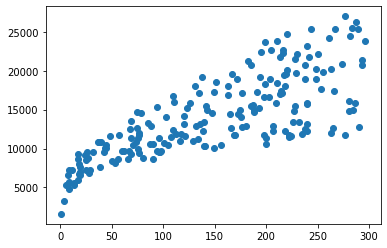

In [10]:
plt.scatter(data['TV'], data['sales']);

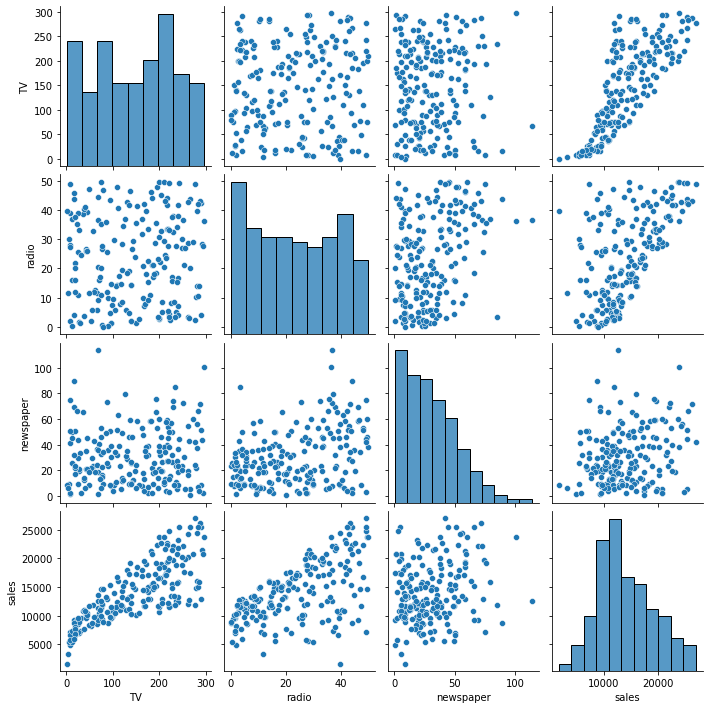

In [12]:
import seaborn as sns
sns.pairplot(data);

In [13]:
data.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


C:\Users\Daney\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sales', ylabel='Density'>

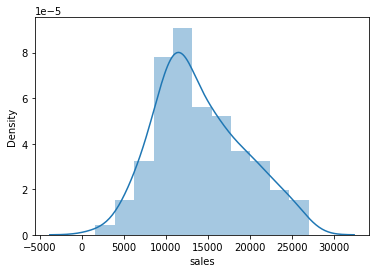

In [14]:
sns.distplot(data['sales'])

# Model
## LinearRegression

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['sales']),
                                                    data['sales'],
                                                    test_size = 0.20,
                                                   random_state=42) 

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

preds = lin_reg.predict(X_test)
print("MSE:", mean_squared_error(preds, y_test))
print("RMSE:", np.sqrt(mean_squared_error(preds, y_test)))

MSE: 3174097.3539761053
RMSE: 1781.5996615334504


## Ridge

In [19]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train, y_train)

preds = ridge.predict(X_test)
print("MSE:", mean_squared_error(preds, y_test))
print("RMSE:", np.sqrt(mean_squared_error(preds, y_test)))

MSE: 3174094.8120927317
RMSE: 1781.598948162221


In [23]:
from sklearn.model_selection import GridSearchCV

prameters = {
    'alpha': [1e-10, 1e-4, 1e-2, 1, 5, 10, 20, 40]
}

ridge_regressor = GridSearchCV(ridge,
                               prameters,
                               n_jobs=-1)

ridge_regressor.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [1e-10, 0.0001, 0.01, 1, 5, 10, 20, 40]})

In [21]:
ridge_regressor.best_params_

{'alpha': 40}

In [24]:
ridge_regressor.best_estimator_

Ridge(alpha=40)

## Lasso

In [25]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train, y_train)

preds = lasso.predict(X_test)

print("MSE:", mean_squared_error(preds, y_test))
print("RMSE:", np.sqrt(mean_squared_error(preds, y_test)))

MSE: 3174061.443031305
RMSE: 1781.5895832181172


In [26]:
prameters = {
    'alpha': [1e-10, 1e-4, 1e-2, 1, 5, 10, 20, 40]
}

lasso_regressor = GridSearchCV(lasso,
                               prameters,
                               n_jobs=-1)

lasso_regressor.fit(X_train, y_train)

GridSearchCV(estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [1e-10, 0.0001, 0.01, 1, 5, 10, 20, 40]})

In [27]:
lasso_regressor.best_params_

{'alpha': 40}

## ElasticNet

In [28]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet()
elastic.fit(X_train, y_train)

preds = elastic.predict(X_test)

print("MSE:", mean_squared_error(preds, y_test))
print("RMSE:", np.sqrt(mean_squared_error(preds, y_test)))

MSE: 3173930.865268616
RMSE: 1781.5529364205308


In [29]:
prameters = {
    'alpha': [1e-10, 1e-4, 1e-2, 1, 5, 10, 20, 40],
    'l1_ratio': np.arange(0, 1, 0.01)
}

elastic_regressor = GridSearchCV(elastic,
                               prameters,
                               n_jobs=-1)

elastic_regressor.fit(X_train, y_train)
elastic_regressor.best_params_

{'alpha': 40, 'l1_ratio': 0.72}